In [1]:
%matplotlib inline
import os
import os.path as op
from glob import glob

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from nilearn import image, plotting

/Users/taylor/Documents/tsalo/nilearn/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data_dir = "/Users/taylor/Documents/datasets/logans-dset/sub-pilot/func/"
files = sorted(glob(op.join(data_dir, "sub-pilot_task-checkerboard_run-2_*_bold.nii.gz")))
echo_times = np.array([9.58, 21.95, 34.32, 46.69, 59.06, 71.43, 83.8, 96.17])

img = image.index_img(files[0], 0)
data = img.get_fdata()
vmax = np.max(data)
idx = np.vstack(np.where(data > 1000))

min_x, min_y, min_z = np.min(idx, axis=1)
max_x, max_y, max_z = np.max(idx, axis=1)

imgs = []
for f in files:
    img = image.index_img(f, 0)
    data = img.get_fdata()
    data = data[min_x:max_x, min_y:max_y, min_z:max_z]
    img = nib.Nifti1Image(data, img.affine, img.header)
    imgs.append(img)

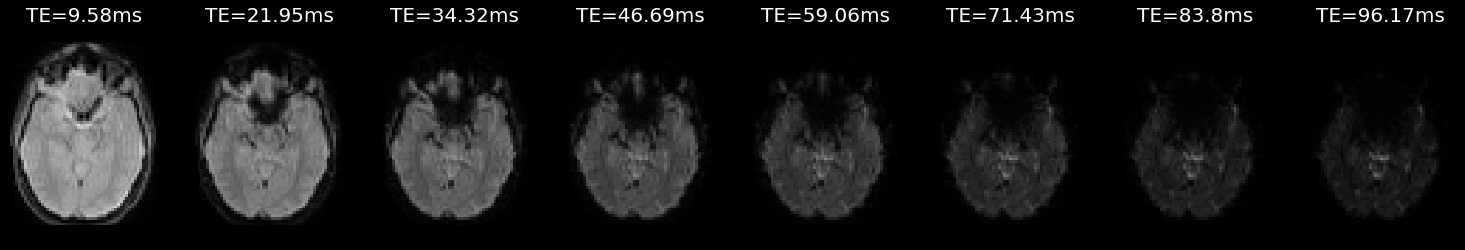

In [7]:
plt.style.use("dark_background")

fig, axes = plt.subplots(figsize=(26, 4), ncols=len(files))
for i_echo, img in enumerate(imgs):
    te = echo_times[i_echo]
    if i_echo == 0:
        data = img.get_fdata()
        vmax = np.max(data)

    plotting.plot_epi(
        img,
        cut_coords=[0],
        display_mode="z",
        annotate=False,
        draw_cross=False,
        axes=axes[i_echo],
        figure=fig,
        vmax=vmax,
        cmap="gray",
    )
    axes[i_echo].set_title(f"TE={te}ms", fontsize=20, pad=0)

fig.savefig("../docs/_static/physics_multiple_echos.png", bbox_inches="tight")